In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
!pip install tensorflow-gpu==1.15

     |████████████████████████████████| 411.5MB 27kB/s 
     |████████████████████████████████| 3.8MB 43.4MB/s 
     |████████████████████████████████| 512kB 32.1MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=04ca7c5c8dbe21641854291a1919aeccd9edf56d4fd160ff7d1f57024c009b10
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow 2.2.0 has requirement gast==0.3.3, but you'll have gast 0.2.2 which is incompatible.
ERROR: tensorflow 2.2.0 has requirement tensorboard<2.3.0,>=2.2.0, but you'll have tensorboard 1.15.0 which is incompatible.
ERROR: tensorflow 2.2.0 has requirement tensorflow-estimator<2.3.0,>=2.2.0, but you'll have tensorflow-estimator 1.15.1 which is incompatible.
ERROR: tensorflow-probability 0.10.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.

In [3]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from scipy.io import loadmat
import math
import numpy as np
import h5py
import scipy
from PIL import Image
from scipy import ndimage
import tensorflow as tf
from tensorflow.python.framework import ops


import tqdm
epsilon = 1e-3

%matplotlib inline
np.random.seed(1)


# For one hot y
from numpy import argmax
from keras.utils import to_categorical


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [4]:
print(tf.__version__)

1.15.0


In [5]:
 """
    Creates a list of random minibatches from (X, Y)
    
    Arguments:
    X -- input data, of shape (input size, number of examples) (m, Hi, Wi, Ci)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples) (m, n_y)
    mini_batch_size - size of the mini-batches, integer
    seed -- this is only for the purpose of grading, so that you're "random minibatches are the same as ours.
    
    Returns:
    mini_batches -- list of synchronous (mini_batch_X, mini_batch_Y)
"""


def random_mini_batches(X, Y, mini_batch_size = 64, seed = 0):
   
    
    m = X.shape[0]                  # number of training examples
    mini_batches = []
    np.random.seed(seed)
    
    # Step 1: Shuffle (X, Y)
    permutation = list(np.random.permutation(m))
    shuffled_X = X[permutation,:,:,:]
    shuffled_Y = Y[permutation,:]

    # Step 2: Partition (shuffled_X, shuffled_Y). Minus the end case.
    num_complete_minibatches = math.floor(m/mini_batch_size) # number of mini batches of size mini_batch_size in your partitionning
    for k in range(0, num_complete_minibatches):
        mini_batch_X = shuffled_X[k * mini_batch_size : k * mini_batch_size + mini_batch_size,:,:,:]
        mini_batch_Y = shuffled_Y[k * mini_batch_size : k * mini_batch_size + mini_batch_size,:]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    # Handling the end case (last mini-batch < mini_batch_size)
    if m % mini_batch_size != 0:
        mini_batch_X = shuffled_X[num_complete_minibatches * mini_batch_size : m,:,:,:]
        mini_batch_Y = shuffled_Y[num_complete_minibatches * mini_batch_size : m,:]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    return mini_batches


In [6]:

# loadmat func to read mat files 
def load_mat_func(path):
    data=loadmat(path)
    return data['X'],data['y']
 

In [7]:
train_X_orig,train_Y_orig=load_mat_func('/content/drive/My Drive/productivity/datasets/svhn/32_32_images/train_32x32.mat')

test_X_orig,test_Y_orig=load_mat_func('/content/drive/My Drive/productivity/datasets/svhn/32_32_images/test_32x32.mat')

# getting shape of training and testing set

print("Shape of training set:",train_X_orig.shape,train_Y_orig.shape)
print("Shape of testing set:",test_X_orig.shape,test_Y_orig.shape)


Shape of training set: (32, 32, 3, 73257) (73257, 1)
Shape of testing set: (32, 32, 3, 26032) (26032, 1)


In [8]:
train_X,train_Y=train_X_orig.transpose((3,0,1,2)),train_Y_orig[: ,0]
test_X,test_Y=test_X_orig.transpose((3,0,1,2)),test_Y_orig[: ,0]
# getting shape of training and testing set after transpose

print("Shape of training set:",train_X.shape,train_Y.shape)
print("Shape of testing set:",test_X.shape,test_Y.shape)


Shape of training set: (73257, 32, 32, 3) (73257,)
Shape of testing set: (26032, 32, 32, 3) (26032,)


In [9]:
# getting shape of training and testing set after transpose

print("Shape of training set:",train_X_orig.shape,train_Y_orig.shape)
print("Shape of testing set:",test_X_orig.shape,test_Y_orig.shape)

Shape of training set: (32, 32, 3, 73257) (73257, 1)
Shape of testing set: (32, 32, 3, 26032) (26032, 1)


In [10]:
train_Y_orig

array([[1],
       [9],
       [2],
       ...,
       [1],
       [6],
       [9]], dtype=uint8)

In [11]:
train_Y

array([1, 9, 2, ..., 1, 6, 9], dtype=uint8)

y = 3


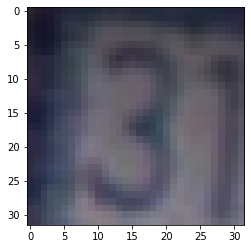

In [12]:
# Example of a picture
index = 8
plt.imshow(train_X[index])
print ("y = " + str(np.squeeze(train_Y_orig[index, :])))

In [13]:
def plot_images(img, labels, nrows, ncols):
    """ Plot nrows x ncols images
    """
    fig, axes = plt.subplots(nrows, ncols)
    for i, ax in enumerate(axes.flat): 
        if img[i].shape == (32, 32, 3):
            ax.imshow(img[i])
        else:
            ax.imshow(img[i,:,:,0])
        ax.set_xticks([]); ax.set_yticks([])
        ax.set_title(labels[i])

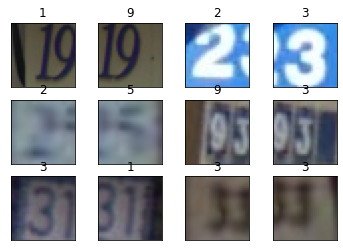

In [14]:
plot_images(train_X,train_Y, 3, 4)

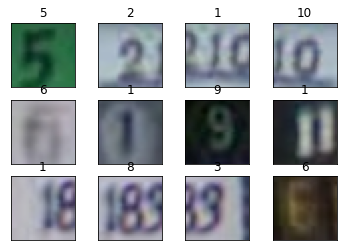

In [15]:
plot_images(test_X,test_Y, 3, 4)


In [16]:
print(np.unique(train_Y))

[ 1  2  3  4  5  6  7  8  9 10]


In [17]:
print(np.unique(test_Y))

[ 1  2  3  4  5  6  7  8  9 10]


In [18]:
np.unique(train_X_orig)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [19]:
np.unique(train_X)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [20]:
train_Y[train_Y==10]=0
test_Y[test_Y==10]=0

In [21]:
# Flatten the training and test images

# numpy allow us to give one of new shape parameter as -1 (eg: (2,-1) or (-1,3) but not (-1, -1)).
# It simply means that it is an unknown dimension and we want numpy to figure it out.
#  And numpy will figure this by looking at the 'length of the array and remaining dimensions
# X_train_flatten = train_X.reshape(train_X.shape[0], -1).T
# X_test_flatten = test_X.reshape(test_X.shape[0], -1).T

In [22]:
# Normalize image vectors
X_train = train_X/255.
X_test = test_X/255.
Y_train=to_categorical(train_Y_orig)
Y_test=to_categorical(test_Y_orig)

In [23]:
X_train.shape

(73257, 32, 32, 3)

In [24]:
X_test.shape

(26032, 32, 32, 3)

In [25]:
Y_train.shape

(73257, 10)

In [26]:
Y_test.shape

(26032, 10)

**Create placeholders**

TensorFlow requires that you create placeholders for the input data that will be fed into the model when running the session.

In [27]:
"""
    Creates the placeholders for the tensorflow session.
    
    Arguments:
    n_H0 -- scalar, height of an input image
    n_W0 -- scalar, width of an input image
    n_C0 -- scalar, number of channels of the input
    n_y -- scalar, number of classes
        
    Returns:
    X -- placeholder for the data input, of shape [None, n_H0, n_W0, n_C0] and dtype "float"
    Y -- placeholder for the input labels, of shape [None, n_y] and dtype "float"
"""
def create_placeholder(n_H0,n_W0,n_C0,n_Y):
  X=tf.placeholder(tf.float32,[None,n_H0,n_W0,n_C0])
  Y=tf.placeholder(tf.float32,[None,n_Y])
  return X,Y

In [28]:
"""
    Initializes weight parameters to build a neural network with tensorflow. The shapes are:
                        W1 : [4, 4, 3, 8]
                        W2 : [2, 2, 8, 16]
    Note that we will hard code the shape values in the function to make the grading simpler.
    Normally, functions should take values as inputs rather than hard coding.
    Returns:
    parameters -- a dictionary of tensors containing W1, W2
"""

def initialize_parameters():
  tf.set_random_seed(1)   
  W1=tf.get_variable("W1",[5,5,3,6],initializer=tf.contrib.layers.xavier_initializer(seed = 0))
  W2=tf.get_variable("W2",[5,5,6,16],initializer=tf.contrib.layers.xavier_initializer(seed = 0))
  W3=tf.get_variable("W3",[5,5,16,32],initializer=tf.contrib.layers.xavier_initializer(seed = 0))
  W4=tf.get_variable("W4",[5,5,16,64],initializer=tf.contrib.layers.xavier_initializer(seed = 0))

  parameters={"W1":W1,
              "W2":W2,
              "W3":W3,
              "W4":W4
              }
  return parameters

Forward Propagation

Implement the forward_propagation function below to build the following model: CONV2D -> RELU -> MAXPOOL -> CONV2D -> RELU -> MAXPOOL -> FLATTEN -> FULLYCONNECTED. 

In [29]:
"""
    Implements the forward propagation for the model:
    CONV2D -> RELU -> MAXPOOL -> CONV2D -> RELU -> MAXPOOL -> FLATTEN -> FULLYCONNECTED
    
    Note that for simplicity and grading purposes, we'll hard-code some values
    such as the stride and kernel (filter) sizes. 
    Normally, functions should take these values as function parameters.
    
    Arguments:
    X -- input dataset placeholder, of shape (input size, number of examples)
    parameters -- python dictionary containing your parameters "W1", "W2"
                  the shapes are given in initialize_parameters

    Returns:
    Z3 -- the output of the last LINEAR unit
"""

def forward_propagation(X,parameters):

  # Retrieve the parameters from the dictionary "parameters" 
  W1=parameters["W1"]
  W2=parameters["W2"]
  W3=parameters["W3"]
  W4=parameters["W4"]

  # Conv2D stride=1x1 and padding same
  Z1=tf.nn.conv2d(X,W1,strides=[1,1,1,1],padding='SAME')

  # # Batch Normalization
  # batch_mean1, batch_var1 = tf.nn.moments(Z1,[0])
  # scale1 = tf.Variable(tf.ones([32,32,8]))
  # beta1 = tf.Variable(tf.zeros([32,32,8]))
  # BN1 = tf.nn.batch_normalization(Z1,batch_mean1,batch_var1,beta1,scale1,epsilon)




  # Relu
  A1=tf.nn.relu(Z1)

  # Max Pooling with stride=8x8,ksize=8x8 and padding=same
  P1=tf.nn.max_pool(A1,ksize=[1,2,2,1],strides=[1,2,2,1],padding='VALID')

  
  
  # Con2d stride=1x1 ,padding=same
  Z2=tf.nn.conv2d(P1,W2,strides=[1,1,1,1],padding='VALID')
  

  # batch_mean2, batch_var2 = tf.nn.moments(Z2,[0])
  # scale2 = tf.Variable(tf.ones([8,8,16]))
  # beta2 = tf.Variable(tf.zeros([8,8,16]))

  # BN2 = tf.nn.batch_normalization(Z2,batch_mean2,batch_var1,beta2,scale2,epsilon)





  # Relu
  A2=tf.nn.relu(Z2)

  # Max Pooling with stride=4x4,ksize=4x4 and padding=same
  P2=tf.nn.max_pool(A2,ksize=[1,2,2,1],strides=[1,2,2,1],padding='VALID')
  
  # Con2d stride=1x1 ,padding=same
  Z3=tf.nn.conv2d(P2,W3,strides=[1,1,1,1],padding='VALID')

  # Relu
  A3=tf.nn.relu(Z2)

  # Max Pooling with stride=4x4,ksize=4x4 and padding=same
  P3=tf.nn.max_pool(A3,ksize=[1,2,2,1],strides=[1,2,2,1],padding='VALID')

  # Con2d stride=1x1 ,padding=same
  Z4=tf.nn.conv2d(P3,W4,strides=[1,1,1,1],padding='VALID')

  # Relu
  A4=tf.nn.relu(Z4)

  # Max Pooling with stride=4x4,ksize=4x4 and padding=same
  P4=tf.nn.max_pool(A4,ksize=[1,2,2,1],strides=[1,2,2,1],padding='VALID')



  # Flatten 
  F=tf.contrib.layers.flatten(P4)
  
 


  # Fully Connected
  Z3=tf.contrib.layers.fully_connected(F,num_outputs=10,activation_fn=None)
  
  return Z3



 **Compute cost**

Implement the compute cost function below. Remember that the cost function helps the neural network see how much the model's predictions differ from the correct labels. By adjusting the weights of the network to reduce the cost, the neural network can improve its predictions.

In [30]:
"""
    Computes the cost
    
    Arguments:
    Z3 -- output of forward propagation (output of the last LINEAR unit), of shape (number of examples, 6)
    Y -- "true" labels vector placeholder, same shape as Z3
    
    Returns:
    cost - Tensor of the cost function
"""

def compute_cost(Z3,Y):
  cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=Z3,labels=Y))
  return cost


Model



Finally you will merge the helper functions you implemented above to build a model. You will train it on the given dataset. 

The model below should:

    * create placeholders
    * initialize parameters
    * forward propagate
    * compute the cost
    * create an optimizer





In [31]:
"""
    Implements a three-layer ConvNet in Tensorflow:
    CONV2D -> RELU -> MAXPOOL -> CONV2D -> RELU -> MAXPOOL -> FLATTEN -> FULLYCONNECTED
    
    Arguments:
    X_train -- training set, of shape (None, 64, 64, 3)
    Y_train -- test set, of shape (None, n_y = 10)
    X_test -- training set, of shape (None, 64, 64, 3)
    Y_test -- test set, of shape (None, n_y = 10)
    learning_rate -- learning rate of the optimization
    num_epochs -- number of epochs of the optimization loop
    minibatch_size -- size of a minibatch
    print_cost -- True to print the cost every 100 epochs
    
    Returns:
    train_accuracy -- real number, accuracy on the train set (X_train)
    test_accuracy -- real number, testing accuracy on the test set (X_test)
    parameters -- parameters learnt by the model. They can then be used to predict.
"""
    




def model(X_train, Y_train, X_test, Y_test, learning_rate = 0.0003,
          num_epochs = 500, minibatch_size = 64, print_cost = True):
  
    
    ops.reset_default_graph()                         # to be able to rerun the model without overwriting tf variables
    tf.set_random_seed(1)                             # to keep results consistent (tensorflow seed)
    seed = 3                                          # to keep results consistent (numpy seed)
    (m, n_H0, n_W0, n_C0) = X_train.shape             
    n_y = Y_train.shape[1]                            
    costs = []                                        # To keep track of the cost
    
    # Create Placeholders of the correct shape
    ### START CODE HERE ### (1 line)
    X, Y = create_placeholder(n_H0, n_W0, n_C0, n_y)
    ### END CODE HERE ###

    # Initialize parameters
    ### START CODE HERE ### (1 line)
    parameters = initialize_parameters()
    ### END CODE HERE ###
    
    # Forward propagation: Build the forward propagation in the tensorflow graph
    ### START CODE HERE ### (1 line)
    Z3 = forward_propagation(X, parameters)
    ### END CODE HERE ###
    
    # Cost function: Add cost function to tensorflow graph
    ### START CODE HERE ### (1 line)
    cost = compute_cost(Z3, Y)
    ### END CODE HERE ###
    
    # Backpropagation: Define the tensorflow optimizer. Use an AdamOptimizer that minimizes the cost.
    ### START CODE HERE ### (1 line)
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss=cost)
    ### END CODE HERE ###
    
    # Initialize all the variables globally
    init = tf.global_variables_initializer()
     
    # Start the session to compute the tensorflow graph
    with tf.Session() as sess:
        
        # Run the initialization
        sess.run(init)
        
        # Do the training loop
        for epoch in range(num_epochs):

            minibatch_cost = 0.
            num_minibatches = int(m / minibatch_size) # number of minibatches of size minibatch_size in the train set
            seed = seed + 1
            minibatches = random_mini_batches(X_train, Y_train, minibatch_size, seed)

            for minibatch in minibatches:

                # Select a minibatch
                (minibatch_X, minibatch_Y) = minibatch
                """
                # IMPORTANT: The line that runs the graph on a minibatch.
                # Run the session to execute the optimizer and the cost.
                # The feedict should contain a minibatch for (X,Y).
                """
                ### START CODE HERE ### (1 line)
                _, temp_cost = sess.run(
                                            fetches=[optimizer, cost],
                                            feed_dict={
                                                X:minibatch_X,
                                                Y:minibatch_Y
                                            }
                
                )
                ### END CODE HERE ###
                
                minibatch_cost += temp_cost / num_minibatches
                

            # Print the cost every epoch
            if print_cost == True and epoch % 5 == 0:
                print ("Cost after epoch %i: %f" % (epoch, minibatch_cost))
            if print_cost == True and epoch % 1 == 0:
                costs.append(minibatch_cost)
        
        
        # plot the cost
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per tens)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()

        # Calculate the correct predictions
        predict_op = tf.argmax(Z3, 1)
        correct_prediction = tf.equal(predict_op, tf.argmax(Y, 1))
        
        # Calculate accuracy on the test set
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
        print(accuracy)
        train_accuracy = accuracy.eval({X: X_train, Y: Y_train})
        test_accuracy = accuracy.eval({X: X_test, Y: Y_test})
        print("Train Accuracy:", train_accuracy)
        print("Test Accuracy:", test_accuracy)
                
        return train_accuracy, test_accuracy, parameters










The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

Cost after epoch 0: 1.464275
Cost after epoch 5: 0.465859
Cost after epoch 10: 0.373913
Cost after epoch 15: 0.325906
Cost after epoch 20: 0.292515
Cost after epoch 25: 0.269327
Cost after epoch 30: 0.246597
Cost after epoch 35: 0.228955
Cost after epoch 40: 0.212023
Cost after epoch 45: 0.199561
Cost after epoc

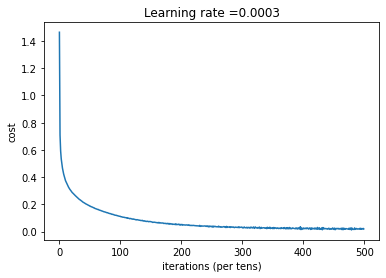

Tensor("Mean_1:0", shape=(), dtype=float32)
Train Accuracy: 0.99197346
Test Accuracy: 0.86067146


In [32]:
_, _, parameters = model(X_train, Y_train, X_test, Y_test)